In [89]:
import sys
sys.path.append("/Users/koushikchennakesavan/Documents/EE364D/ml-covid-nba/")
from injuryScore import InjuryScore
import pandas as pd
import matplotlib.pyplot as plt
#c = injuryScore.injuryScore("embiijo01", 2021)
from prophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

In [90]:
df = InjuryScore("Joel Embiid", 2021).getInjuryScore()
df2 = InjuryScore("Joel Embiid", 2022).getInjuryScore()

df = pd.concat([df, df2], ignore_index=True)
df = df.drop(['MP'], axis = 1)
df = df.rename(columns = {'DATE': 'ds', 'Injury and Fatigue Score': 'y'})

You searched for "Joel Embiid"
1 result found.
Joel Embiid
Results for Joel Embiid:

You searched for "Joel Embiid"
1 result found.
Joel Embiid
Results for Joel Embiid:



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


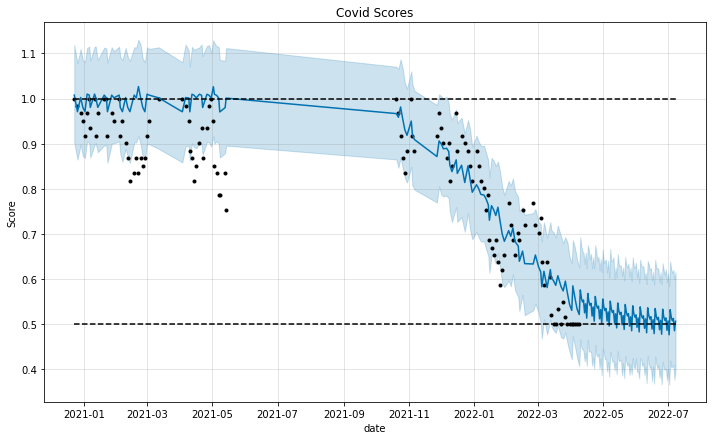

In [91]:
model = Prophet(changepoint_prior_scale=0.70, daily_seasonality=False, growth='logistic')
df['floor'] = 0.5
df['cap'] = 1.0
model.fit(df)
forecast = model.make_future_dataframe(periods = 90, freq="D")
forecast['floor'] = 0.5
forecast['cap'] = 1.0
build_forecast = model.predict(forecast)
model.plot(build_forecast, xlabel = 'date', ylabel= 'Score')
plt.title("Covid Scores")
plt.show()

In [92]:
data_cv = cross_validation(model, initial='5 days', period='10 days', horizon='30 days')

pm = performance_metrics(data_cv)
print(pm.tail(3))

INFO:fbprophet:Making 29 forecasts with cutoffs between 2021-01-04 00:00:00 and 2022-03-10 00:00:00


  0%|          | 0/29 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 3.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
INFO:prophet:n_changepoints greater than number of observations. Using 16.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
INFO:prophet:n_changepoints greater than number of observations. Using 24.


   horizon       mse      rmse       mae      mape     mdape  coverage
24 28 days  0.024396  0.156193  0.114549  0.156438  0.077314  0.321839
25 29 days  0.025499  0.159685  0.123484  0.159783  0.117835  0.293103
26 30 days  0.026394  0.162463  0.132626  0.175199  0.163465  0.285714
